# ML Model Comparison Using lazypredict

In [1]:
! pip install lazypredict

In [2]:
! pip install lightgbm

In [3]:
import lightgbm

In [4]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

In [5]:
dataset = 'csv/serotonin_dataset_pIC50_pubchem.csv'
df = pd.read_csv(dataset)
df

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.94
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.38
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.48
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.56
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2829,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.37
2830,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.87
2831,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.06
2832,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.89


In [24]:
x = df.drop('pIC50', axis=1)
y = df['pIC50']

# Data Pre-Processing

In [25]:
x.shape

(2834, 881)

In [26]:
#remove low variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
x = selection.fit_transform(x)
x.shape

(2834, 145)

In [27]:
#data split (80:20 ratio)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [28]:
len(x_train)

2267

In [29]:
# Defines and builds the lazyclassifier
reg = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
train,test = reg.fit(x_train, x_test, y_train, y_test)
# models_train,predictions_train = reg.fit(x_train, x_train, y_train, y_train)
# models_test,predictions_test = reg.fit(x_train, x_test, y_train, y_test)

100%|███████████████████████████████████████████| 42/42 [01:53<00:00,  2.69s/it]


In [30]:
# Performance table of the training set (80% subset)
train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
LGBMRegressor,0.20,0.40,0.94,0.28
HistGradientBoostingRegressor,0.20,0.40,0.94,1.02
GradientBoostingRegressor,0.15,0.37,0.96,0.59
SVR,0.14,0.36,0.97,0.59
NuSVR,0.14,0.36,0.97,0.46
RandomForestRegressor,0.09,0.32,1.00,1.56
MLPRegressor,0.09,0.32,1.00,2.60
BaggingRegressor,0.06,0.30,1.01,0.16
RidgeCV,0.06,0.30,1.01,0.03


In [31]:
# Performance table of the test set (20% subset)
test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
LGBMRegressor,0.20,0.40,0.94,0.28
HistGradientBoostingRegressor,0.20,0.40,0.94,1.02
GradientBoostingRegressor,0.15,0.37,0.96,0.59
SVR,0.14,0.36,0.97,0.59
NuSVR,0.14,0.36,0.97,0.46
RandomForestRegressor,0.09,0.32,1.00,1.56
MLPRegressor,0.09,0.32,1.00,2.60
BaggingRegressor,0.06,0.30,1.01,0.16
RidgeCV,0.06,0.30,1.01,0.03


# Data Visualization of Model Performance

[(0.0, 1.0)]

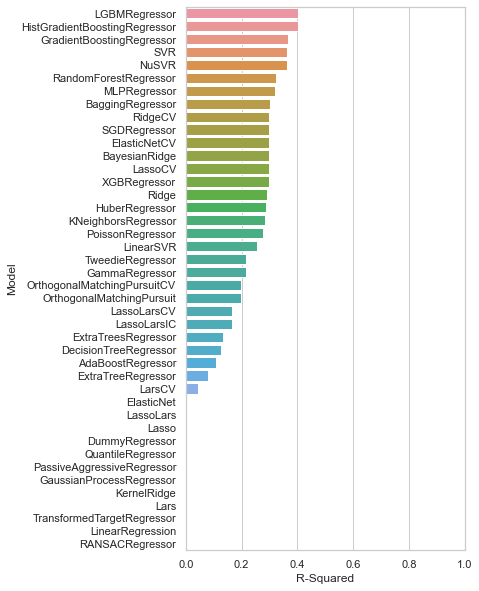

In [32]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=train.index, x="R-Squared", data=train)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

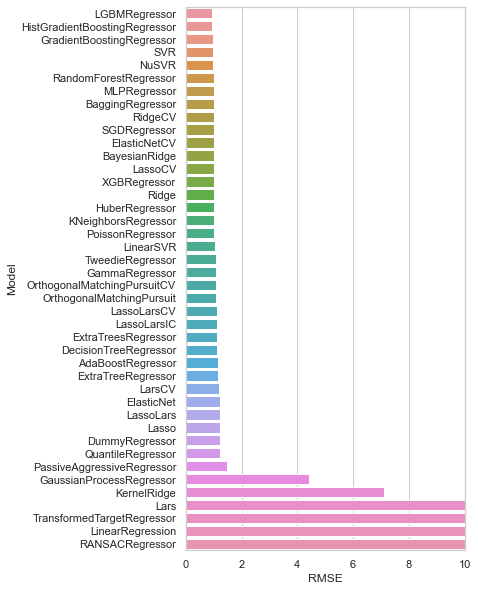

In [33]:
# Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=train.index, x="RMSE", data=train)
ax.set(xlim=(0, 10))

[(0.0, 10.0)]

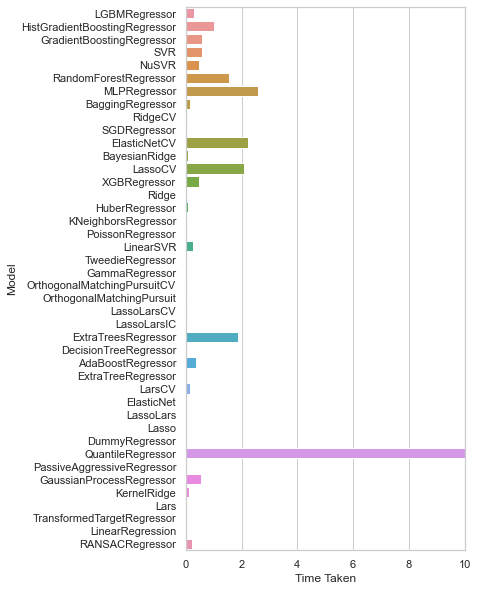

In [34]:

# Bar plot of calculation time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=train.index, x="Time Taken", data=train)
ax.set(xlim=(0, 10))

# Try LGBMRegressor

In [35]:
import lightgbm as lgb

In [39]:
#to get consistant result
model = lgb.LGBMRegressor(n_estimators=100, random_state = 42)
model.fit(x_train, y_train)
result = model.score(x_test, y_test)
result

0.4020616845849124

In [42]:
y_pred = model.predict(x_test)
y_pred

array([8.08432065, 3.25771398, 6.85807945, 7.1453553 , 5.63773557,
       8.00747755, 6.69697246, 5.22661664, 7.87961671, 7.5977252 ,
       7.00118161, 6.41980083, 7.89060745, 7.07113674, 5.80665862,
       7.35277993, 7.64908256, 6.47627219, 7.645095  , 7.02553107,
       7.05642648, 7.69309139, 6.76428947, 7.45518366, 7.56257227,
       7.588658  , 7.05352026, 6.87257475, 6.47627219, 7.03134522,
       6.6990236 , 6.56187971, 7.67010653, 7.16219108, 7.99791541,
       6.18928944, 6.5298273 , 7.6826287 , 6.94485467, 7.97222649,
       7.76854615, 7.1453553 , 8.07936548, 6.70385035, 7.18900302,
       7.06808396, 5.60095654, 6.84502909, 7.42055244, 7.519325  ,
       7.88500001, 7.67010653, 7.20577011, 7.2323046 , 4.4185834 ,
       7.01781779, 7.49398834, 7.77687347, 8.05352962, 7.32333168,
       6.69238654, 8.0754955 , 7.73463391, 7.27050149, 7.13084004,
       7.49814982, 7.05010504, 7.26342949, 6.9571101 , 7.43899479,
       5.61626622, 7.16186363, 8.00854184, 7.78662819, 7.15529

<function matplotlib.pyplot.show(close=None, block=None)>

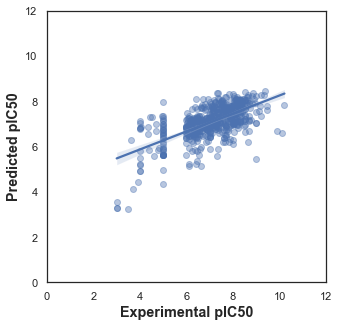

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show